# Perform Hyperparameter Tuning for KNN and SVM above trained models and plot the comparision results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
data=datasets.load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [3]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
data1=df.copy()
data1["Traget"]=data.target
data1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Traget
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Traget  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


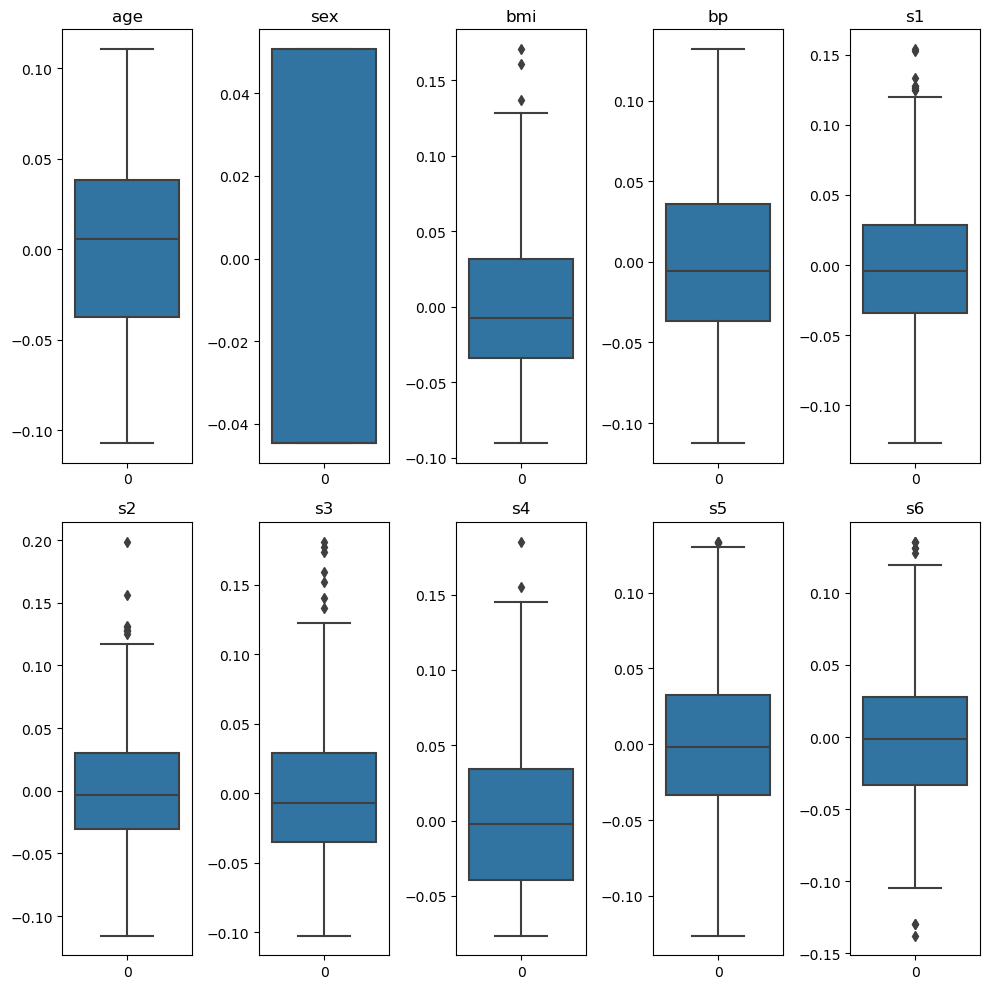

In [8]:
def boxplot(data):
    n=len(data.columns)
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(2,5,1+i)
        plt.title(data.columns[i])
        sns.boxplot(data[data.columns[i]])
    plt.tight_layout()
    plt.show()    
boxplot(df)        

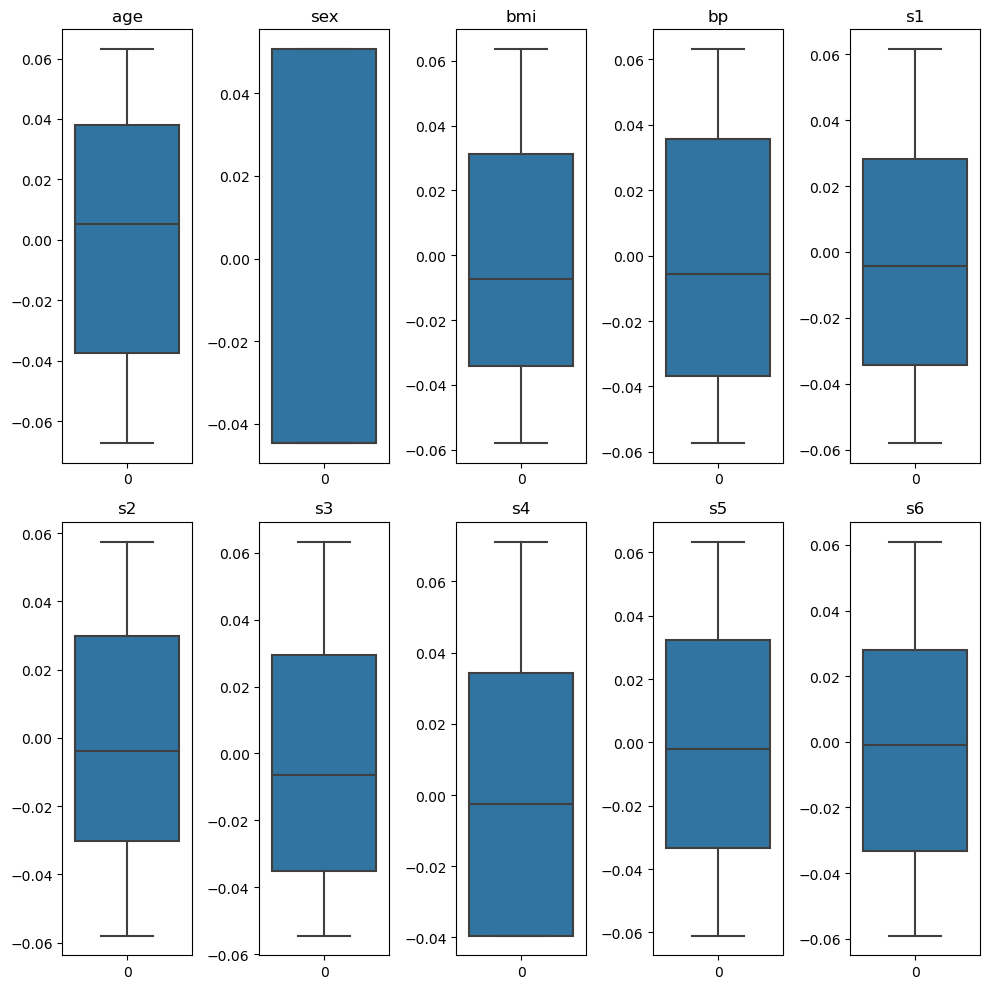

In [10]:
df.clip(df.quantile(0.1),df.quantile(0.9),axis=1,inplace=True)
boxplot(df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feat1=df[["bmi","bp","s4","s5"]]
X_train, X_test, y_train, y_test = train_test_split(feat1, data1["Traget"], test_size=0.2, random_state=42)

In [13]:
from sklearn.svm import SVC,SVR

In [14]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [15]:
from sklearn.metrics import r2_score

In [16]:
y_pred=svr.predict(X_test)
accur=r2_score(y_test,y_pred)
print(accur)

0.32239876180282545


In [17]:
def svm_ke_kernel(feat,target):
    X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.33, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    r2_scor=[]
    for i in kernels:
        svc=SVR(kernel=i)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        accur=r2_score(y_test,y_pred)
        r2_scor.append(accur)
        
    return r2_scor     
accurac=svm_ke_kernel(feat1,data1["Traget"])        

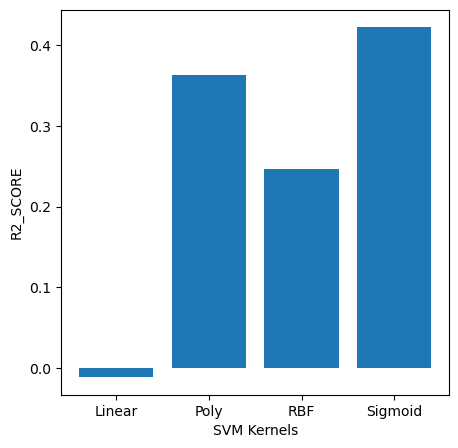

In [19]:
plt.figure(figsize=(5, 5))
plt.bar(np.arange(len(accurac)), accurac)
plt.xticks(np.arange(len(accurac)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernels')
plt.ylabel('R2_SCORE')
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [21]:
cvs=cross_val_score(svr,feat1, data1["Traget"],cv=10)

In [25]:
paramas={'C':[1,10,100,500,1000],"kernel":['linear', 'poly', 'rbf', 'sigmoid']}
grid=GridSearchCV(svr,paramas,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

<Axes: >

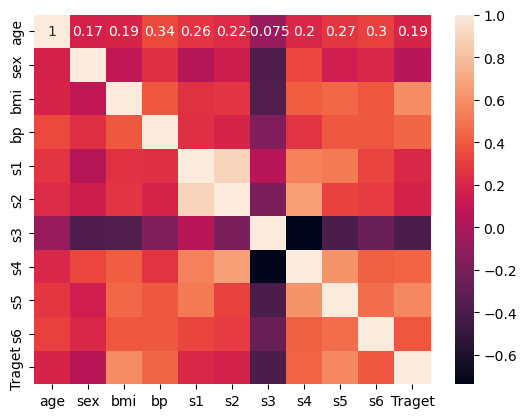

In [26]:
sns.heatmap(data1.corr(),annot=True)

In [27]:
grid.best_params_

{'C': 500, 'kernel': 'linear'}

In [28]:
don=pd.DataFrame(grid.cv_results_)

In [29]:
don

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005180,0.006915,0.000680,0.000696,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.065614,-0.076683,-0.006759,0.001557,-0.036875,0.034621,17
1,0.004735,0.003019,0.001498,0.000500,1,poly,"{'C': 1, 'kernel': 'poly'}",0.319849,0.268022,0.403044,0.276185,0.316775,0.053563,10
2,0.002872,0.001669,0.001510,0.001109,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.161031,0.164633,0.244518,0.248389,0.204643,0.041853,15
3,0.003446,0.002025,0.004184,0.005499,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.365292,0.268734,0.417704,0.382209,0.358485,0.055162,6
4,0.002798,0.000339,0.001495,0.000500,10,linear,"{'C': 10, 'kernel': 'linear'}",0.002592,-0.006312,0.073499,0.071865,0.035411,0.037408,16
5,0.002769,0.001640,0.000748,0.000827,10,poly,"{'C': 10, 'kernel': 'poly'}",0.457739,0.243096,0.478249,0.313061,0.373036,0.098394,5
6,0.004331,0.007501,0.004291,0.007432,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.448682,0.234223,0.464527,0.441543,0.397244,0.094487,3
7,0.002896,0.001874,0.000748,0.000827,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.434952,0.294421,0.473444,0.371096,0.393478,0.067875,4
8,0.004180,0.007241,0.000125,0.000217,100,linear,"{'C': 100, 'kernel': 'linear'}",0.327014,0.273043,0.418132,0.366098,0.346072,0.053127,8
9,0.006788,0.005879,0.001183,0.000777,100,poly,"{'C': 100, 'kernel': 'poly'}",0.421651,0.194983,0.453378,0.211766,0.320444,0.117756,9


In [30]:
svr1=SVR(C=500,kernel="linear")
svr1.fit(X_train,y_train)

SVR(C=500, kernel='linear')

In [31]:
y_pred=svr1.predict(X_test)
accur1=r2_score(y_test,y_pred)
print(accur1)

0.4620212771356639


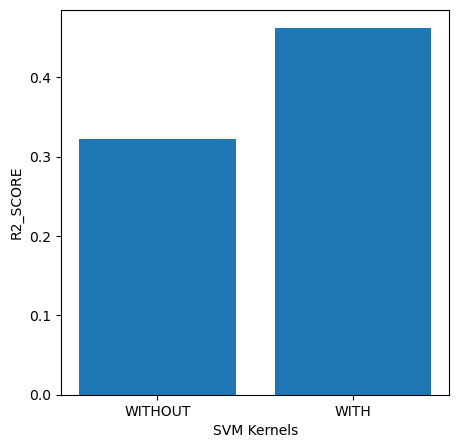

In [33]:
acc=[accur,accur1]
plt.figure(figsize=(5, 5))
plt.bar(np.arange(len(acc)), acc)
plt.xticks(np.arange(len(acc)), ['WITHOUT', "WITH"])
plt.xlabel('SVM Kernels')
plt.ylabel('R2_SCORE')
plt.show()